In [1]:
from icecream import ic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

2023-11-28 09:15:11.783082: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 09:15:11.814840: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Problematic of our dataset : revenues based upon the online shoppers intention

### goal : to analyse the dataset, and be able to predict if a consumer is going to pay or not

In [3]:
dataset = pd.read_csv("online_shoppers_intention.csv")
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Data Processing

In [5]:
# imputation of null values
dataset.dropna(inplace=True) # no null values found
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']] = scaler.fit_transform(dataset[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']])

In [7]:
dataset[["BounceRates", "ExitRates", "PageValues", "SpecialDay"]] = scaler.fit_transform(dataset[["BounceRates", "ExitRates", "PageValues", "SpecialDay"]])

In [8]:
dataset.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0,0.0,2,0.000516,0.000000,0.500000,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
96,0,0.0,0,0.0,6,0.024487,0.250000,0.333333,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
97,0,0.0,0,0.0,4,0.001641,0.000000,0.125000,0.0,0.6,Feb,1,1,1,4,Returning_Visitor,False,False
98,0,0.0,1,0.0,7,0.000782,0.190476,0.404762,0.0,0.6,Feb,2,4,1,7,Returning_Visitor,False,False


In [9]:
# replacing months with the conrresponding number 
dataset['Month'] = dataset['Month'].replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


In [10]:
# categorization of VisitorType, weekend and Revenue
dataset['VisitorType'] = dataset['VisitorType'].replace(['Returning_Visitor','New_Visitor','Other'],[1,2,3])
dataset['Weekend'] = dataset['Weekend'].replace([True,False],[1,0])
dataset['Revenue'] = dataset['Revenue'].replace([True,False],[1,0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
# dividing the dataset into features and labels

features = dataset.drop('Revenue', axis=1)
labels = dataset['Revenue']
labels = labels.replace([True, False], [1, 0])
labels = labels.astype('int')
np_labels = np.array(labels)
np_features = np.array(features)
np_features = np_features.astype('float')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Visualizing

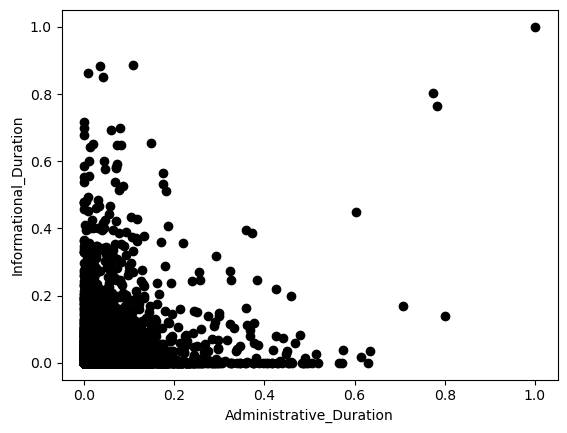

In [43]:
# plotting different features against each other
plt.plot(dataset['Administrative_Duration'], dataset['Informational_Duration'], 'o', color='black');
plt.xlabel('Administrative_Duration')
plt.ylabel('Informational_Duration')
plt.show()

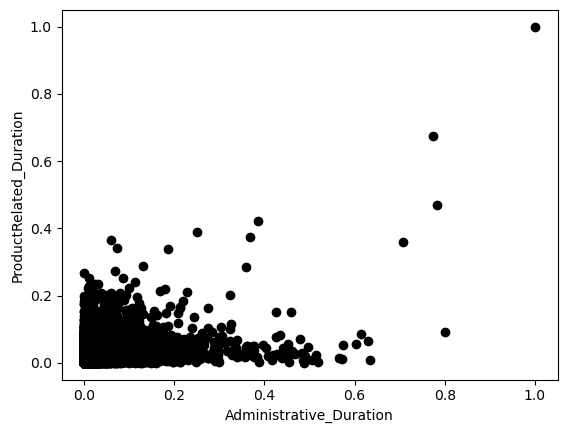

In [10]:
plt.plot(dataset['Administrative_Duration'], dataset['ProductRelated_Duration'], 'o', color='black');
plt.xlabel('Administrative_Duration')
plt.ylabel('ProductRelated_Duration')
plt.show()

c:\Users\charl\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


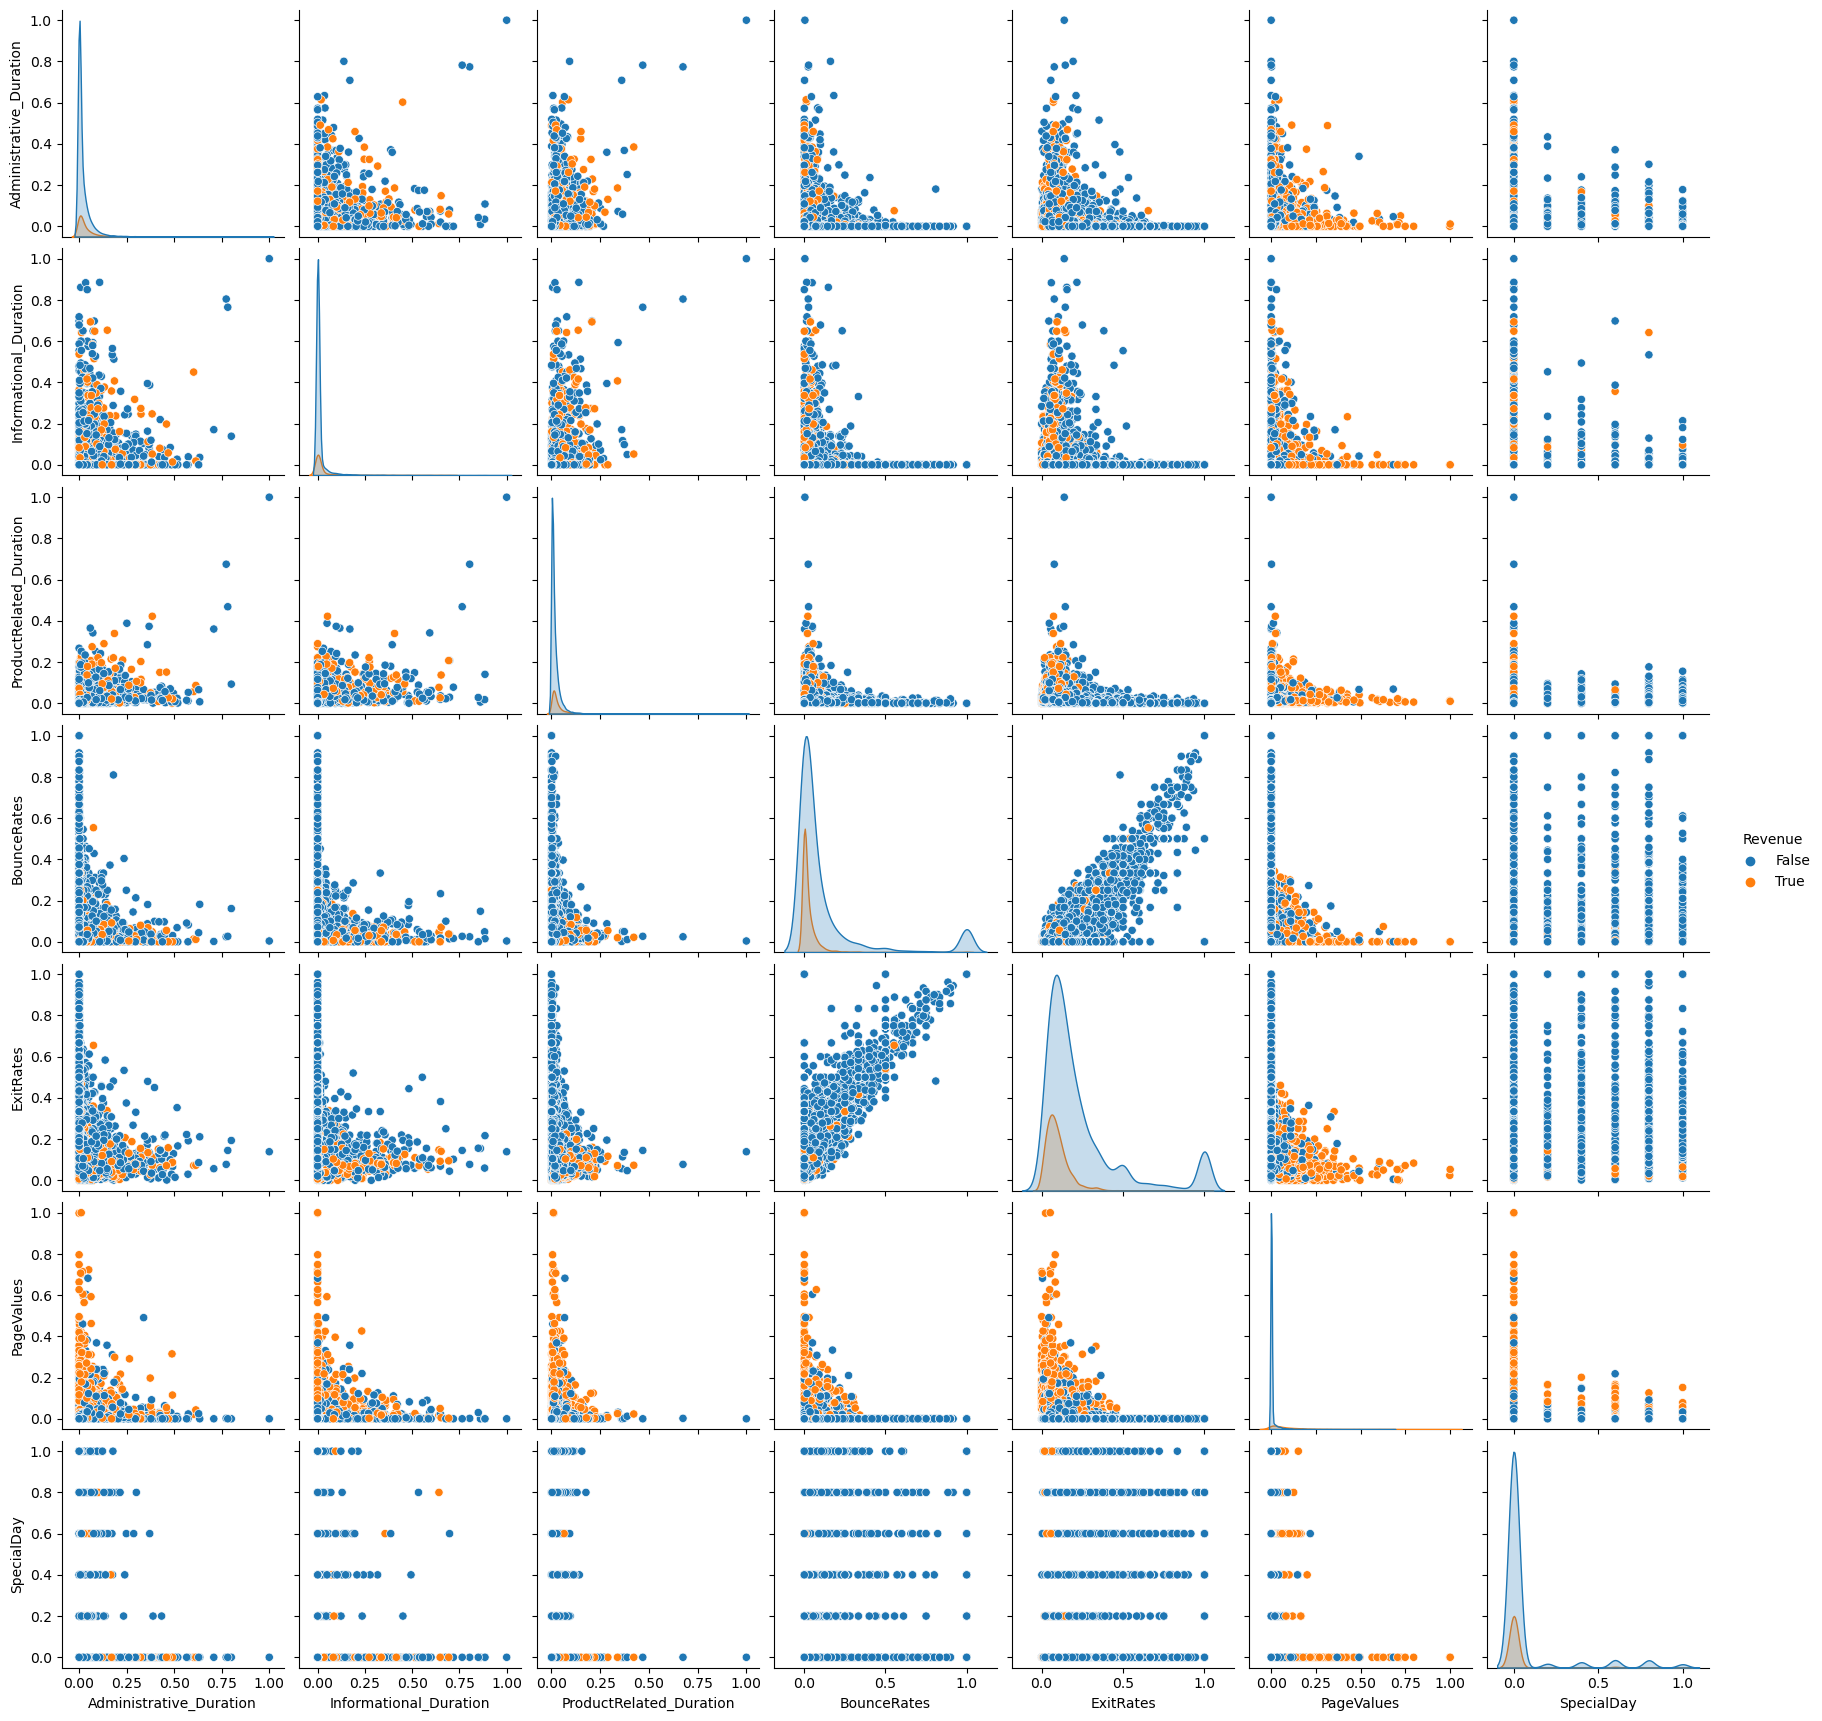

In [19]:
# sort of a heatmap
sns.pairplot(dataset, hue='Revenue', vars=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'])
plt.show()

In [44]:
sns.pairplot(dataset, hue='Revenue', vars=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'], kind = "kde")
plt.show()

KeyboardInterrupt: 

In [1]:
# PCA projection to 2D
from sklearn.decomposition import PCA
#create a dataset containing all the non categorical features
tmp_dataset = dataset[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']]
pca = PCA(n_components=2)
pca.fit(tmp_dataset)
X_pca = pca.transform(tmp_dataset)
print("Original shape: {}".format(str(tmp_dataset.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tmp_dataset['Revenue'], edgecolor='none', alpha=0.7, s=40)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


NameError: name 'dataset' is not defined

# Training

In [11]:
# we are going to use dbscan and kmeans clustering algorithms to search for clusters in the dataset
from sklearn.cluster import DBSCAN, KMeans

tmp_dataset = dataset.drop('Month', axis=1)
tmp_dataset = tmp_dataset.drop('VisitorType', axis=1)


dbscan = DBSCAN(eps=0.1, min_samples=5) # problem with the eps value
KMeans = KMeans(n_clusters=2)

dbscanned = dbscan.fit(tmp_dataset)
kmeaned = KMeans.fit(tmp_dataset)


/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
tmp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Weekend               

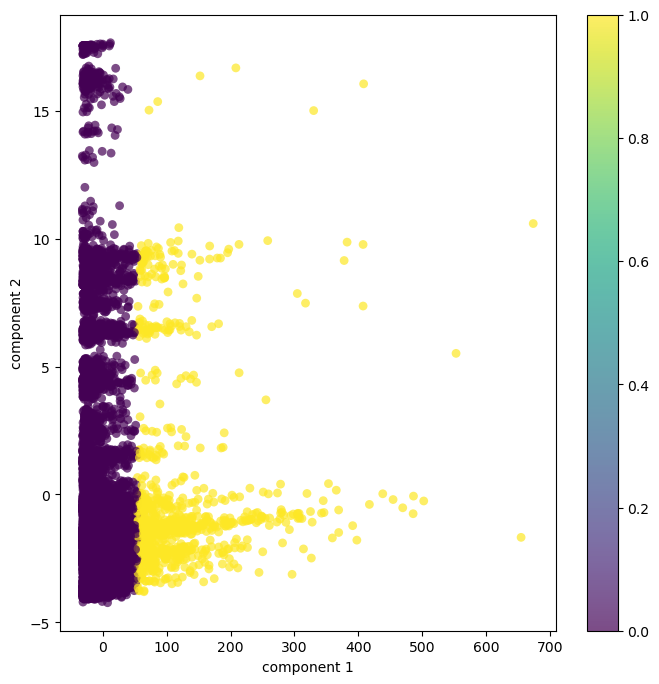

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset)
# plot the dbscan clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeaned.labels_, edgecolor='none', alpha=0.7, s=40)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

In [28]:
np_labels.shape

(12330,)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Grid Search
param_grid = {'C': [i for i in np.arange(1, 10000,10)]}

# Create the Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Create the Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)

# Fit the Grid Search object to the data
grid_search.fit(np_features, np_labels)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


KeyboardInterrupt: 

In [ ]:
best_params = {'C': 1121} # hard coded so that the grid search doesn't run every time
best_score = 0.880

(12330, 17)

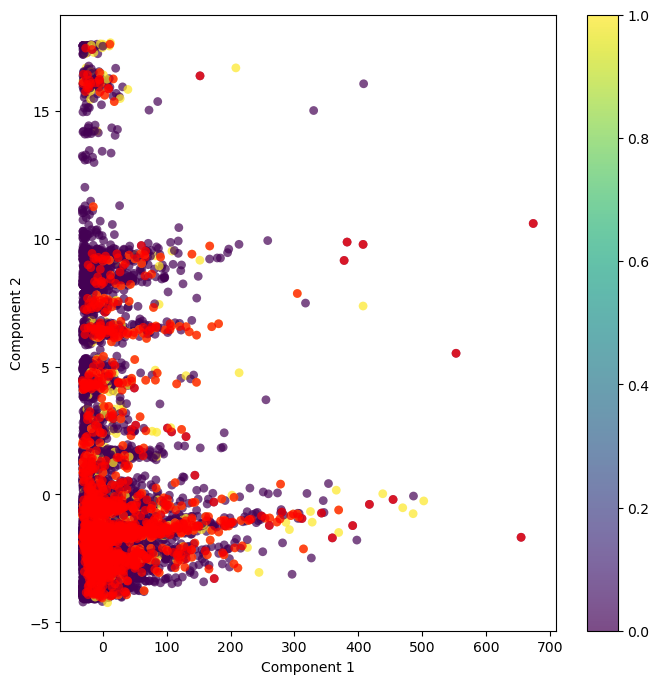

In [14]:
# Fit the Logistic Regression model with the best parameter
best_model = LogisticRegression(max_iter=10000, C=best_params['C'])
best_model.fit(np_features, np_labels)

# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np_features)

# Predict the labels using the best model
predicted_labels = best_model.predict(np_features)

# Get the indices of the points that are misclassified
misclassified_indices = np.where(predicted_labels != np_labels)[0]

# Plot the misclassified points using PCA in 2 dimensions
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np_labels, edgecolor='none', alpha=0.7, s=40)
plt.scatter(X_pca[misclassified_indices, 0], X_pca[misclassified_indices, 1], c='red', edgecolor='none', alpha=0.7, s=40)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()


#### Conclusion : a lot of values are missing, we need to find a way to fill them

# Bonus : label prediction with Tensorflow

**idea** : We can try to use a neural network to predict the labels of our dataset. We will use the Tensorflow library to do so.

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# split the dataset into train and test
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.2, random_state=42)

# create the model

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[17]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# train the model
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=1, epochs=1000
)

Epoch 1/1000


2023-11-28 09:16:16.206903: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-28 09:16:16.207561: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:503 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-11-28 09:16:16.220291: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-28 09:16:16.220890: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:503 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-11-28 09:16:16.233716: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-11-28 09:16:16.234326: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:5

InternalError: Graph execution error:

Detected at node 'Adam/StatefulPartitionedCall_4' defined at (most recent call last):
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance
      app.start()
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start
      self.io_loop.start()
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue
      await self.process_one()
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one
      await dispatch(*args)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell
      await result
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request
      reply_content = await reply_content
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute
      res = shell.run_cell(
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_1290/1237652111.py", line 26, in <module>
      history = model.fit(
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/engine/training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1230, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1260, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1352, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/charles/anaconda3/envs/rapids-23.10/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1347, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'Adam/StatefulPartitionedCall_4'
libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_2021]

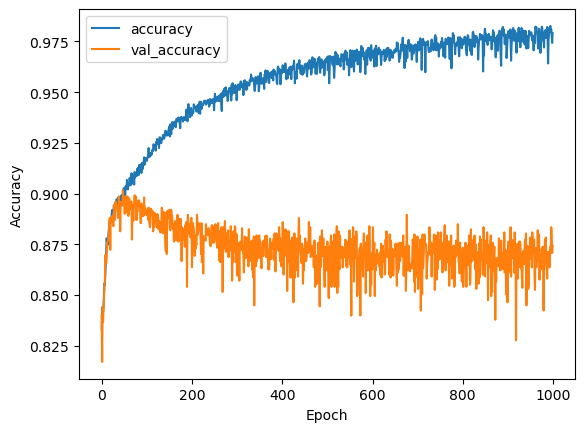

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

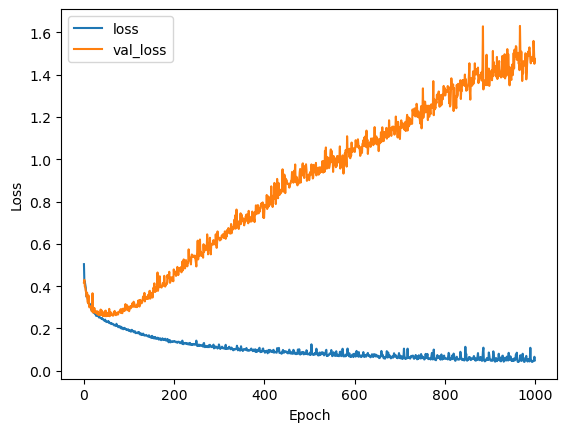

In [21]:
# plot the loss and accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# we save the model to use it later
model.save('model.h5')